In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson, uniform

Параметры модели

In [11]:
BUDGET = 100_000_000  # бюджет в рублях
PASSENGER_COUNT = 1000  # количество пассажиров в день
CHECKIN_DESKS = 20  # количество стоек регистрации
SECURITY_POINTS = 10  # количество пунктов стандартной проверки
FAST_TRACK_POINTS = 2  # количество пунктов ускоренной проверки
CHECKIN_TIME = (2, 5)  # мин. и макс. время на регистрацию
SECURITY_TIME = (3, 8)  # мин. и макс. время на стандартную проверку
FAST_TRACK_TIME = (1, 3)  # мин. и макс. время на ускоренную проверку


Генерация данных о времени прибытия пассажиров

In [12]:
arrival_times = np.random.randint(10, 121, size=PASSENGER_COUNT)  # от 10 до 120 минут
checkin_required = np.random.choice([True, False], size=PASSENGER_COUNT, p=[0.5, 0.5])

Создание DataFrame для моделирования

In [13]:
passengers = pd.DataFrame({
    'PassID': range(1, PASSENGER_COUNT + 1),
    'ArrTime': arrival_times,
    'CheckInRequired': checkin_required,
    'CheckInTime': np.where(checkin_required, np.random.randint(*CHECKIN_TIME, size=PASSENGER_COUNT), 0),
    'SecurityType': np.random.choice(['Standard', 'FastTrack'], size=PASSENGER_COUNT, p=[0.8, 0.2]),
})

In [14]:
# Время на прохождение безопасности
passengers['SecurityTime'] = passengers['SecurityType'].apply(
    lambda x: np.random.randint(*SECURITY_TIME) if x == 'Standard' else np.random.randint(*FAST_TRACK_TIME)
)

# Расчет общего времени на обработку пассажира
passengers['TotalTime'] = passengers['CheckInTime'] + passengers['SecurityTime']

# Этапы обработки пассажиров
def process_stages(row):
    stages = []
    if row['CheckInRequired']:
        stages.append(f"Check-in: {row['CheckInTime']} мин.")
    else:
        stages.append("Check-in: Онлайн")
    stages.append(f"Security ({row['SecurityType']}): {row['SecurityTime']} мин.")
    stages.append(f"Total: {row['TotalTime']} мин.")
    return " -> ".join(stages)

passengers['ProcessStages'] = passengers.apply(process_stages, axis=1)

# Анализ загруженности стоек регистрации
checkin_desk_load = passengers[passengers['CheckInRequired']].groupby('ArrTime').size()
security_load = passengers.groupby('ArrTime').size()


In [15]:
# Подробная таблица этапов обработки
print("\nПодробная таблица этапов обработки пассажиров:")
wide_table = passengers[['PassID', 'ArrTime', 'CheckInRequired', 'CheckInTime', 'SecurityType', 'SecurityTime', 'TotalTime', 'ProcessStages']]
print(wide_table.head(10).to_string(index=False))



Подробная таблица этапов обработки пассажиров:
 PassID  ArrTime  CheckInRequired  CheckInTime SecurityType  SecurityTime  TotalTime                                                     ProcessStages
      1       44            False            0     Standard             5          5  Check-in: Онлайн -> Security (Standard): 5 мин. -> Total: 5 мин.
      2       39            False            0     Standard             3          3  Check-in: Онлайн -> Security (Standard): 3 мин. -> Total: 3 мин.
      3       14            False            0     Standard             4          4  Check-in: Онлайн -> Security (Standard): 4 мин. -> Total: 4 мин.
      4       60            False            0     Standard             4          4  Check-in: Онлайн -> Security (Standard): 4 мин. -> Total: 4 мин.
      5       35            False            0     Standard             3          3  Check-in: Онлайн -> Security (Standard): 3 мин. -> Total: 3 мин.
      6       97            False            0

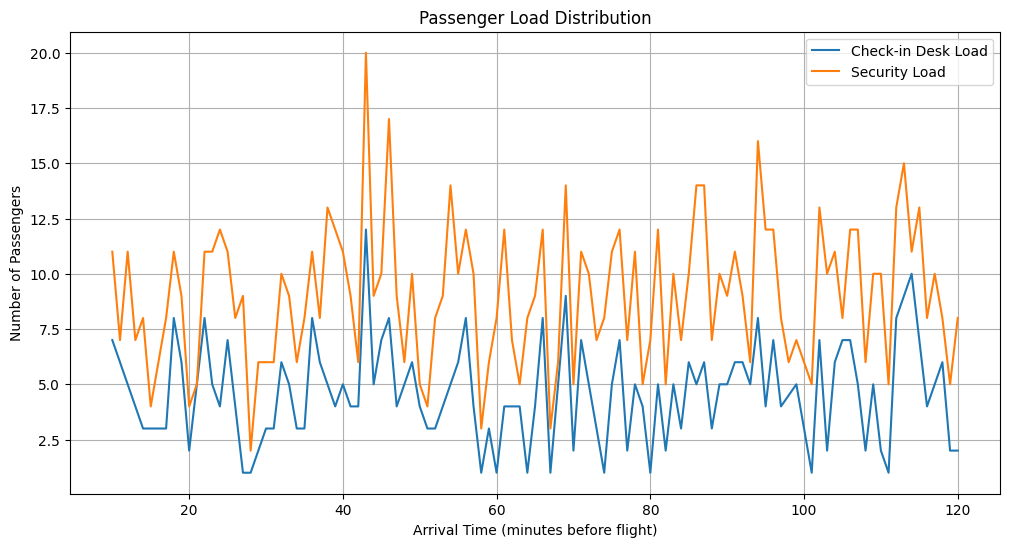

In [16]:
# Визуализация загруженности
plt.figure(figsize=(12, 6))
plt.plot(checkin_desk_load.index, checkin_desk_load.values, label='Check-in Desk Load')
plt.plot(security_load.index, security_load.values, label='Security Load')
plt.xlabel('Arrival Time (minutes before flight)')
plt.ylabel('Number of Passengers')
plt.title('Passenger Load Distribution')
plt.legend()
plt.grid()
plt.show()

In [17]:
# Анализ влияния улучшений
new_security_time = passengers['SecurityType'].apply(
    lambda x: np.random.randint(1, 3) if x == 'Standard' else np.random.randint(1, 2)
)
passengers['ImprovedTotalTime'] = passengers['CheckInTime'] + new_security_time

# Экономия времени
passengers['TimeSaved'] = passengers['TotalTime'] - passengers['ImprovedTotalTime']

average_time_saved = passengers['TimeSaved'].mean()
print(f"Среднее время, сэкономленное на пассажира после улучшений: {average_time_saved:.2f} минут")

# Затраты на улучшения
advanced_scanners_cost = 20_000_000  # руб. за сканеры
travelator_cost = 15_000_000  # руб. за траволаторы
remaining_budget = BUDGET - (advanced_scanners_cost + travelator_cost)

print(f"Оставшийся бюджет после улучшений: {remaining_budget:,} рублей")

# Подробная таблица этапов обработки
print("\nПодробная таблица этапов обработки пассажиров:")
wide_table = passengers[['PassID', 'ArrTime', 'CheckInRequired', 'CheckInTime', 'SecurityType', 'SecurityTime', 'TotalTime', 'ProcessStages']]
print(wide_table.head(10).to_string(index=False))


Среднее время, сэкономленное на пассажира после улучшений: 2.96 минут
Оставшийся бюджет после улучшений: 65,000,000 рублей

Подробная таблица этапов обработки пассажиров:
 PassID  ArrTime  CheckInRequired  CheckInTime SecurityType  SecurityTime  TotalTime                                                     ProcessStages
      1       44            False            0     Standard             5          5  Check-in: Онлайн -> Security (Standard): 5 мин. -> Total: 5 мин.
      2       39            False            0     Standard             3          3  Check-in: Онлайн -> Security (Standard): 3 мин. -> Total: 3 мин.
      3       14            False            0     Standard             4          4  Check-in: Онлайн -> Security (Standard): 4 мин. -> Total: 4 мин.
      4       60            False            0     Standard             4          4  Check-in: Онлайн -> Security (Standard): 4 мин. -> Total: 4 мин.
      5       35            False            0     Standard             3 